<a href="https://colab.research.google.com/github/jtao22/cvdML/blob/main/heartdisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#README.md: This code classifies whether or not an individual has a cardiovascular disease

In [ ]:
#Import
import numpy as np
import pandas as pd
import seaborn as sb


In [ ]:
#Upload data
from google.colab import files
newfile = files.upload()


Saving cardio_train.csv to cardio_train.csv


In [ ]:
#Log data into var
info = pd.read_csv('cardio_train.csv',sep=';')

#Print first 10 rows data
info.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
#Checked size of data, checked if any cells empty
info.shape

info.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
#statistical analysis 
info.describe()

#compare counts
info['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

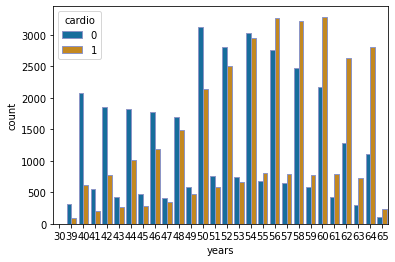

In [ ]:
#Add years column
info['years'] = pd.to_numeric((info['age']/365).round(0),downcast='integer')

#Plot age distribution for having/not having cardiovascular disease
sb.countplot(x='years', hue = 'cardio', data = info, palette='colorblind', edgecolor = sb.color_palette('BuPu',n_colors =1))

In [ ]:
#Remove years and id columns
info = info.drop('years',axis=1)
info = info.drop('id', axis=1)

In [ ]:
#Categorize data
ind = info.iloc[:,:-1].values
targ = info.iloc[:,-1].values

In [ ]:
#Split into training/testing (75/25)
from sklearn.model_selection import train_test_split
indtrain,indtest,targtrain, targtest =  train_test_split(ind,targ,test_size=0.25,random_state =1)

In [ ]:
#Scale values
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
indtrain = ss.fit_transform(indtrain)
indtest = ss.fit_transform(indtest)


In [ ]:
#Implement RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state = 1)
rfc.fit(indtrain,targtrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
#Test accuracy on training data
model = rfc
model.score(indtrain,targtrain)

0.979904761904762

In [ ]:
#Test accuracy on test  data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(targtest, model.predict(indtest))

trueneg = cm[0][0]
truepos = cm[1][1]
falseneg= cm[1][0]
falsepos= cm[0][1]

print(cm)

print('Accuracy = {}'.format((truepos+trueneg)/(truepos+trueneg+falsepos+falseneg)))

[[6589 2020]
 [3349 5542]]
Accuracy = 0.6932
